In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import numpy as np

In [2]:
%pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
from wordcloud import WordCloud, STOPWORDS

In [4]:
def make_wordcloud(df, column_name):
    
    text = ' '.join(df[column_name].values)
    
    exclude = [
        'using',
        'CMS',
        'open',
        'data',
        'collider',
        'event',
        'TeV',
        'analysis',
        'based',
        'LHC',
        'particle',
        'end'
    ]

    stopwords = set(STOPWORDS)

    for e in exclude:
        stopwords.add(e)
    
    wc = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=600,
        height=400
    ).generate(text)
    
    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [5]:
def process_dataframe(input_json):
    
    exclude_names = [
        'McCauley',
        'Bellis',
        'Lange',
        'Tibor',
        'Šimko',
        'Carerra',
        'Geiser',
        'Lassila-Perini',
        'Dallmeier-Tiessen',
        'Calderon',
        'Rao',
        'Socher',
        'Carrera',
        'Herterich'
    ]
    
    df = pd.read_json(input_json)
    
    '''
    Adds a new column where each row is a list of names from exclude_names 
    that match (substring) those in the author list contained in the authors column
    '''
    df['exclude'] = df['authors'].map(lambda x: [e for e in exclude_names if any(e in xn for xn in x)])
    
    print(df.shape[0])
    
    '''
    Filter out rows in-place where there are matches from the
    excluded names
    '''
    df = df[df['exclude'].str.len() == 0]
    
    print(df.shape[0])
    
    '''
    Reorder the rows by date and reorder the indices. 
    Then add an index column.
    '''
    df.sort_values(by='date', inplace=True)
    df.reset_index(drop='True', inplace=True)
    df.reset_index(inplace=True)
    
    '''
    Format date
    '''
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
    
    return df

In [6]:
def make_histogram(df, date_range, nbins, title):
    
    dates = df['date'].to_numpy(dtype='datetime64[Y]')
    
    h, b = np.histogram(
        dates.astype(int),
        range=date_range,
        bins=nbins
    )

    b = np.array([np.datetime64(int(value), 'Y') for value in b])

    plt.bar(b[:-1], h, width=np.diff(b), ec='black', align='edge')
    plt.gca().set_xticks(b)
    plt.gca().set_xticklabels(b, rotation=45)

    plt.title(title)

    plt.show()

These papers reference a CMS open data DOI

In [7]:
idf = process_dataframe('data/inspire.json')

81
66


In [8]:
idf.head()

,index,abstract,authors,date,doi,title,url,exclude
0,0,The splitting function is a universal property...,"[Larkoski, Andrew, Marzani, Simone, Thaler, Je...",2017-04-19,10.1103/PhysRevLett.119.132003,Exposing the QCD Splitting Function with CMS O...,https://inspirehep.net/literature/1591972,[]
1,1,The application of deep learning techniques us...,"[Madrazo, Celia Fernández, Cacha, Ignacio Here...",2017-08-25,10.1051/epjconf/201921406017,Application of a Convolutional Neural Network ...,https://inspirehep.net/literature/1618344,[]
2,2,Daily operation of a large-scale experiment is...,"[Borisyak, Maxim, Ratnikov, Fedor, Derkach, De...",2017-09-26,10.1088/1742-6596/898/9/092041,Towards automation of data quality system for ...,https://inspirehep.net/literature/1625297,[]
3,3,The need for processing the ever-increasing am...,"[Piparo, D., Tejedor, E., Guiraud, E., Ganis, ...",2017-11-27,10.1088/1742-6596/898/7/072022,Expressing Parallelism with ROOT,https://inspirehep.net/literature/1638554,[]
4,4,Deep generative models parametrised by neural ...,"[Musella, Pasquale, Pandolfi, Francesco]",2018-05-03,10.1007/s41781-018-0015-y,Fast and Accurate Simulation of Particle Detec...,https://inspirehep.net/literature/1671151,[]


In [9]:
idf.tail()

,index,abstract,authors,date,doi,title,url,exclude
61,61,Despite extensive theoretical and experimental...,"[Cesarotti, Cari]",2023-12-05,,Hints of a Hidden World,https://inspirehep.net/literature/2730282,[]
62,62,We use the CMS Open Data to examine the perfor...,"[Dolan, Matthew J., Gargalionis, John, Ore, Ay...",2023-12-07,,Quark-versus-gluon tagging in CMS Open Data wi...,https://inspirehep.net/literature/2731403,[]
63,63,Après l'observation du boson de Higgs par les ...,"[Lohezic, Victor]",2024-01-16,,The measurement of the Higgs Boson properties ...,https://inspirehep.net/literature/2747079,[]
64,64,This study presents a novel method for the def...,"[Sunneborn Gudnadottir, Olga, Gallén, Axel, Ri...",2024-04-08,,Sparks in the Dark,https://inspirehep.net/literature/2774596,[]
65,65,"In the realm of scientific computing, both Jul...","[Osborne, Ianna, Pivarski, Jim, Ling, Jerry]",2024-04-30,,Bridging Worlds: Achieving Language Interopera...,https://inspirehep.net/literature/2781858,[]


Text(0, 0.5, 'Number of papers')

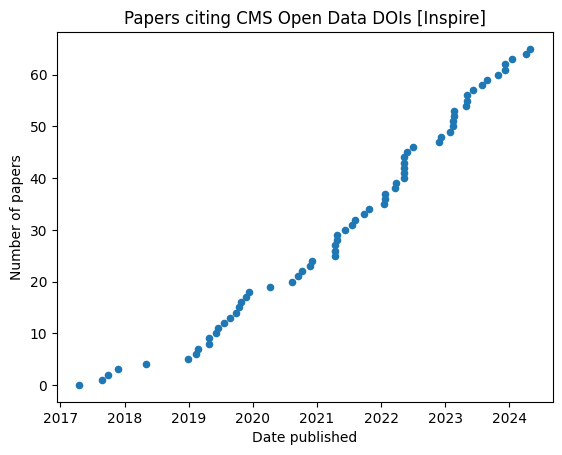

In [10]:
ax = idf.plot(
    kind='scatter',
    x='date', 
    y='index',
    title='Papers citing CMS Open Data DOIs [Inspire]'
)

ax.set_xlabel('Date published')
ax.set_ylabel('Number of papers')

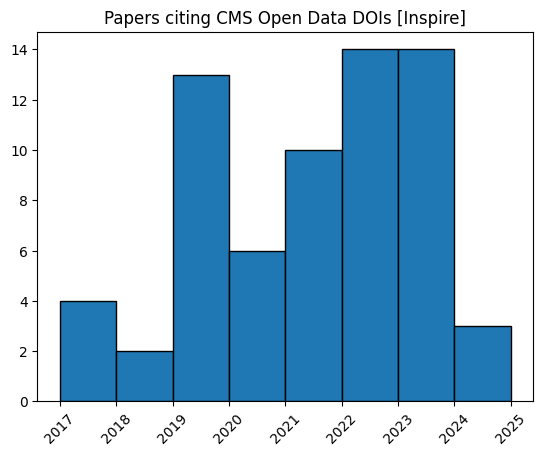

In [11]:
make_histogram(
    idf,
    (np.datetime64('2017').astype(int), np.datetime64('2025').astype(int)),
    8,
    'Papers citing CMS Open Data DOIs [Inspire]'
)

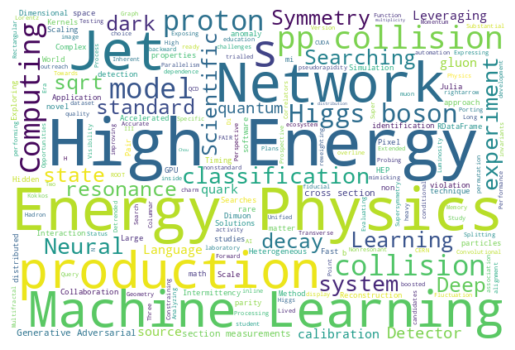

In [12]:
make_wordcloud(idf, 'title')

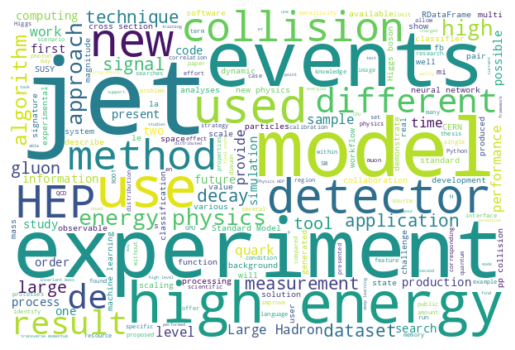

In [13]:
make_wordcloud(idf, 'abstract')

In [14]:
adf = process_dataframe('data/arxiv.json')

29
28


In [15]:
adf.head()

,index,abstract,authors,date,doi,title,url,exclude
0,0,The splitting function is a universal property...,"[Andrew Larkoski, Simone Marzani, Jesse Thaler...",2017-04-17,http://dx.doi.org/10.1103/PhysRevLett.119.132003,Exposing the QCD Splitting Function with CMS O...,http://arxiv.org/abs/1704.05066v3,[]
1,1,We use public data from the CMS experiment to ...,"[Aashish Tripathee, Wei Xue, Andrew Larkoski, ...",2017-04-19,http://dx.doi.org/10.1103/PhysRevD.96.074003,Jet Substructure Studies with CMS Open Data,http://arxiv.org/abs/1704.05842v3,[]
2,2,This paper describes the construction of novel...,"[Michael Andrews, Manfred Paulini, Sergei Gley...",2018-07-31,http://dx.doi.org/10.1007/s41781-020-00038-8,End-to-End Physics Event Classification with C...,http://arxiv.org/abs/1807.11916v3,[]
3,3,We study dimuon events in 2.11/fb of 7 TeV pp ...,"[Cari Cesarotti, Yotam Soreq, Matthew J. Stras...",2019-02-12,http://dx.doi.org/10.1103/PhysRevD.100.015021,Searching in CMS Open Data for Dimuon Resonanc...,http://arxiv.org/abs/1902.04222v2,[]
4,4,We describe the construction of end-to-end jet...,"[Michael Andrews, John Alison, Sitong An, Patr...",2019-02-21,http://dx.doi.org/10.1016/j.nima.2020.164304,End-to-End Jet Classification of Quarks and Gl...,http://arxiv.org/abs/1902.08276v2,[]


In [16]:
adf.tail()

,index,abstract,authors,date,doi,title,url,exclude
23,23,Precise measurements of the energy of jets eme...,"[Daniel Holmberg, Dejan Golubovic, Henning Kir...",2023-08-24,http://dx.doi.org/10.1007/s41781-023-00103-y,Jet energy calibration with deep learning as a...,http://arxiv.org/abs/2308.12724v2,[]
24,24,We use the CMS Open Data to examine the perfor...,"[Matthew J. Dolan, John Gargalionis, Ayodele Ore]",2023-12-06,http://arxiv.org/abs/2312.03434v1,Quark-versus-gluon tagging in CMS Open Data wi...,http://arxiv.org/abs/2312.03434v1,[]
25,25,This study aims to improve the performance of ...,"[Tomoe Kishimoto, Masahiro Morinaga, Masahiko ...",2023-12-12,http://arxiv.org/abs/2312.06909v1,Pre-training strategy using real particle coll...,http://arxiv.org/abs/2312.06909v1,[]
26,26,This note summarizes the lectures given in the...,[Konstantinos Theofilatos],2024-03-13,http://arxiv.org/abs/2403.08907v1,The terascale tutorial,http://arxiv.org/abs/2403.08907v1,[]
27,27,This study presents a novel method for the def...,"[Olga Sunneborn Gudnadottir, Axel Gallén, Giul...",2024-04-05,http://arxiv.org/abs/2404.04138v1,Sparks in the Dark,http://arxiv.org/abs/2404.04138v1,[]


Text(0, 0.5, 'Number of papers')

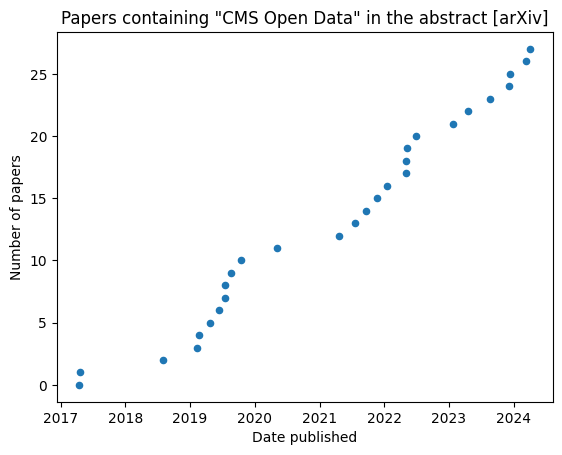

In [17]:
ax = adf.plot(
    kind='scatter',
    x='date', 
    y='index',
    title='Papers containing "CMS Open Data" in the abstract [arXiv]'
)

ax.set_xlabel('Date published')
ax.set_ylabel('Number of papers')

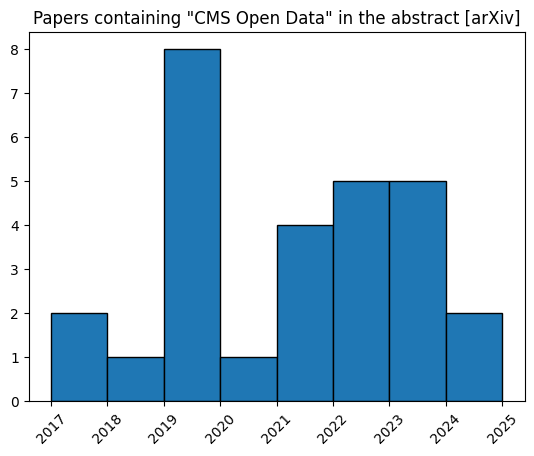

In [18]:
make_histogram(
    adf,
    (np.datetime64('2017').astype(int), np.datetime64('2025').astype(int)),
    8,
    'Papers containing "CMS Open Data" in the abstract [arXiv]'
)

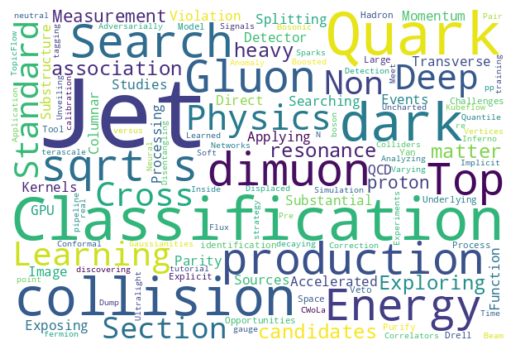

In [19]:
make_wordcloud(adf, 'title')

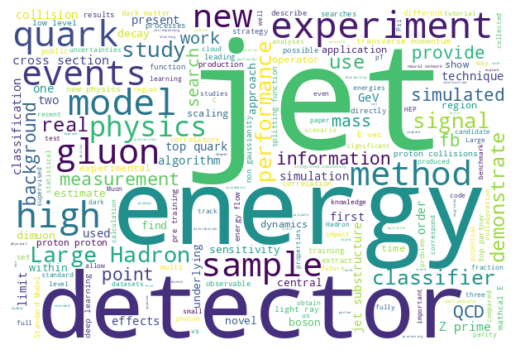

In [20]:
make_wordcloud(adf, 'abstract')